In this notebook, I select S-1 report and delete duplicates

In [1]:
import pandas as pd

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (13.0, 7.0)
import datetime

In [3]:
df=pd.read_csv('.../Annual_n_S1.csv') # Load SEC reports

In [4]:
df.shape

(125940, 5)

In [5]:
df['conm']=df.conm.str.lower() # lower case the company names 
df['date']=pd.to_datetime(df.date) # convert date variable to a date time variable 
df['year']=df.date.dt.year # Create a year and month variable
df['month']=df.date.dt.month

### Select only S1 reports

In [6]:
S1=df[df['type']=='S-1']

In [7]:
'There are ' + str(S1.shape[0])+ ' reports in the sample' 

'There are 14184 reports in the sample'

## Let's look at how often companies file form S1s

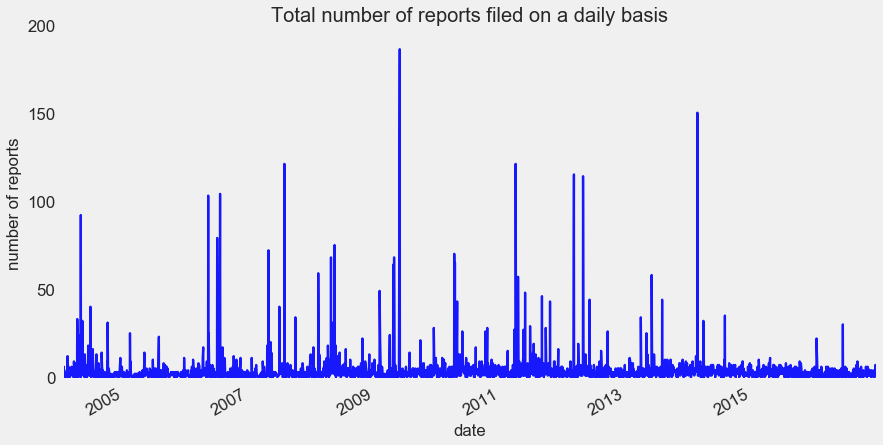

In [8]:
S1.sort_values('date')['date'].value_counts().plot(linewidth=2.3, alpha=0.9, color='b')
plt.xlabel('date')
plt.ylabel('number of reports')
plt.title('Total number of reports filed on a daily basis')
plt.tick_params(labelsize='large')
plt.grid(False)

It appears on certain days, there are tremendous numbers of S1 reports being filed. This is likely an indicator of duplicates. Sometimes a company amy file an ammendment at a later date. In this analysis, I will assume that when a company files more than one report, then the final report is the only report that I consider useful

In [9]:
S1.drop_duplicates(["cik"], inplace=True)
S1.reset_index(inplace=True)
print "After deleting correcting for amendments, there are " + str(S1.shape[0]) + " reports."


After deleting correcting for amendments, there are 9312 reports.


//anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


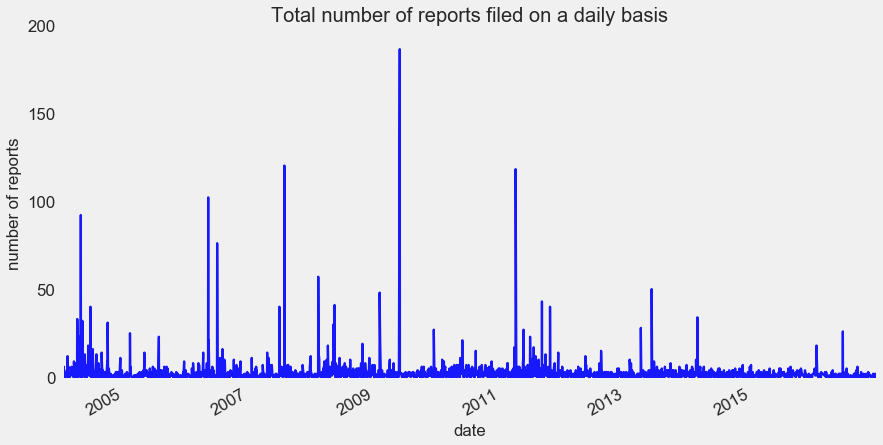

In [10]:
S1.sort_values('date')['date'].value_counts().plot(linewidth=2.3, alpha=0.9, color='b')
plt.xlabel('date')
plt.ylabel('number of reports')
plt.title('Total number of reports filed on a daily basis')
plt.tick_params(labelsize='large')
plt.grid(False)

While some duplicates were dropped, there are still a few days with very high numbers of reports

In [11]:
repeated_dates=S1.groupby('date')['conm'].count().reset_index() #group by date to see the number per day

In [12]:
repeated_dates[repeated_dates.conm>=50] #observe the days with more than 50 reports

,date,conm
66,2004-04-28,93
465,2006-05-09,103
497,2006-06-30,77
699,2007-07-26,121
799,2008-02-08,58
1087,2009-05-27,187
1497,2011-04-01,119
1961,2013-05-31,51


In [13]:
S1[S1.date==datetime.date(2004,4,28)] #Observe 04/28/2004

,index,cik,conm,type,date,path,year,month
286,7089,1198126,athens mri llc,S-1,2004-04-28,edgar/data/1198126/0001047469-04-014104.txt,2004,4
287,7090,1198131,bridgeton mri & imaging center llc,S-1,2004-04-28,edgar/data/1198131/0001047469-04-014104.txt,2004,4
288,7091,1198134,buckhead diagnostic imaging llc,S-1,2004-04-28,edgar/data/1198134/0001047469-04-014104.txt,2004,4
289,7092,1198137,cape imaging llc,S-1,2004-04-28,edgar/data/1198137/0001047469-04-014104.txt,2004,4
290,7093,1198138,carolina medical imaging llc,S-1,2004-04-28,edgar/data/1198138/0001047469-04-014104.txt,2004,4
291,7094,1198140,coastal imaging llc,S-1,2004-04-28,edgar/data/1198140/0001047469-04-014104.txt,2004,4
292,7095,1198142,cumming diagnostic imaging llc,S-1,2004-04-28,edgar/data/1198142/0001047469-04-014104.txt,2004,4
293,7096,1198143,diagnostic imaging of atlanta llc,S-1,2004-04-28,edgar/data/1198143/0001047469-04-014104.txt,2004,4
294,7097,1198147,diagnostic imaging of georgia llc,S-1,2004-04-28,edgar/data/1198147/0001047469-04-014104.txt,2004,4
295,7098,1198148,diagnostic imaging of hiram llc,S-1,2004-04-28,edgar/data/1198148/0001047469-04-014104.txt,2004,4


Looking closer at the path column, it appears that the numbers after the last dash are identical for all the rows: a possible indicator that they all belong to the same company.

In [14]:
S1[S1.date==datetime.date(2006,5,9)]

,index,cik,conm,type,date,path,year,month
1649,26240,1032044,amc entertainment international inc,S-1,2006-05-09,edgar/data/1032044/0001047469-06-006738.txt,2006,5
1650,26241,1032045,national cinema network inc,S-1,2006-05-09,edgar/data/1032045/0001047469-06-006738.txt,2006,5
1696,26644,1322069,"fall river cinema, inc.",S-1,2006-05-09,edgar/data/1322069/0001047469-06-006738.txt,2006,5
1697,26645,1322070,liberty tree cinema corp.,S-1,2006-05-09,edgar/data/1322070/0001047469-06-006738.txt,2006,5
1698,26646,1322071,"loews cheri cinemas, inc.",S-1,2006-05-09,edgar/data/1322071/0001047469-06-006738.txt,2006,5
1699,26647,1322088,"loews fresh pond cinemas, inc.",S-1,2006-05-09,edgar/data/1322088/0001047469-06-006738.txt,2006,5
1700,26648,1322094,"nickelodeon boston, inc.",S-1,2006-05-09,edgar/data/1322094/0001047469-06-006738.txt,2006,5
1701,26649,1322095,loews citywalk theatre corp,S-1,2006-05-09,edgar/data/1322095/0001047469-06-006738.txt,2006,5
1702,26650,1322096,"sack theatres, inc.",S-1,2006-05-09,edgar/data/1322096/0001047469-06-006738.txt,2006,5
1703,26651,1322097,s&j theatres inc.,S-1,2006-05-09,edgar/data/1322097/0001047469-06-006738.txt,2006,5


My solution involves splitting this column and then grouping the data on that column to reflect that is the same company report

In [15]:
S1.sort_values('date',inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
S1['specific_path']=[row[3] for row in S1.path.str.split('/')]

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
S1_cleaned=S1.drop_duplicates(['specific_path'])

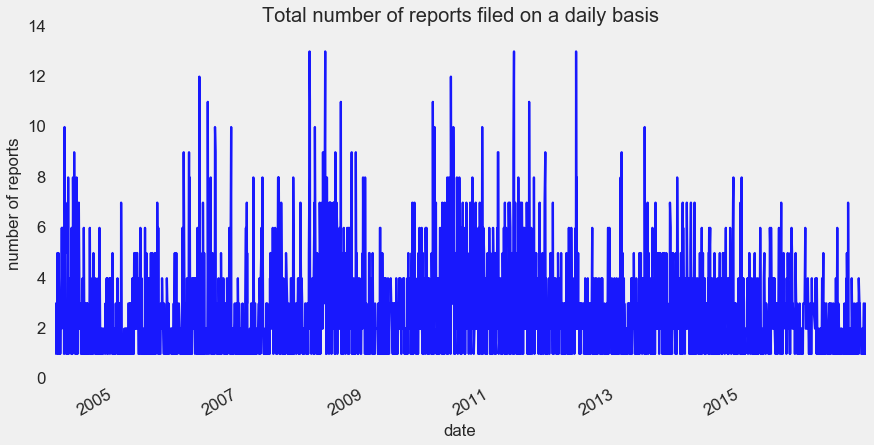

In [18]:
S1_cleaned.sort_values('date')['date'].value_counts().plot(linewidth=2.3, alpha=0.9, color='b')
plt.xlabel('date')
plt.ylabel('number of reports')
plt.title('Total number of reports filed on a daily basis')
plt.tick_params(labelsize='large')
plt.grid(False)
plt.savefig('/Users/oladipoositelu/Desktop/KBYIPO/dailyIPOs_corrected.png',bbox_inches='tight')

The dataset looks more reasonable and I have much confidence in using it for my analysis